<a href="https://colab.research.google.com/github/manushiez/ML.fuel/blob/main/ML_fuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing**

In [ ]:
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import seaborn as sns
import warnings

pd.options.plotting.backend = 'plotly'
warnings.filterwarnings('ignore')

# **Data Loading**

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/manushiez/ML.fuel/main/auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


# **Data Preparation**




In [ ]:
df.shape

(398, 9)

In [ ]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
df.isnull().mean() * 100

mpg             0.0
cylinders       0.0
displacement    0.0
horsepower      0.0
weight          0.0
acceleration    0.0
model year      0.0
origin          0.0
car name        0.0
dtype: float64

In [ ]:
df.duplicated().value_counts()

False    398
dtype: int64

In [ ]:
df['car name'].value_counts()

ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: car name, Length: 305, dtype: int64

In [ ]:
df['brand'] = df['car name'].apply(lambda x: x.split()[0])
df['name'] = df['car name'].apply(lambda x: ' '.join(x.split()[1:]))
df.drop(['car name'], axis=1, inplace=True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet,chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick,skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc,rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford,torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford,mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw,pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge,rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford,ranger


In summary, this code splits the 'car name' column in the DataFrame into two columns, 'brand' and 'name', based on the assumption that the brand name is the first word in the 'car name' value. The original 'car name' column is then dropped, leaving the DataFrame with the modified structure.

In [ ]:
df.nunique().sort_values(ascending=False)

weight          351
name            300
mpg             129
acceleration     95
horsepower       94
displacement     82
brand            37
model year       13
cylinders         5
origin            3
dtype: int64

In [ ]:
df['brand'].value_counts()

ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
vw                6
volvo             6
renault           5
saab              4
subaru            4
opel              4
chevy             3
bmw               2
cadillac          2
maxda             2
mercedes-benz     2
triumph           1
vokswagen         1
mercedes          1
hi                1
capri             1
chevroelt         1
toyouta           1
nissan            1
Name: brand, dtype: int64

# **Data Cleaning**





In [ ]:
def fix_brand_names(brand):
    if brand in ['vw', 'vokswagen']:
        return 'volkswagen'
    elif brand in ['chevy', 'chevroelt']:
        return 'chevrolet'
    elif brand == 'maxda':
        return 'mazda'
    elif brand == 'mercedes':
        return 'mercedes-benz'
    elif brand == 'toyouta':
        return 'toyota'
    else:
        return brand

In [ ]:
df['brand'] = df['brand'].apply(lambda x: fix_brand_names(x))
df['brand'].value_counts()

ford             51
chevrolet        47
plymouth         31
amc              28
dodge            28
toyota           26
datsun           23
volkswagen       22
buick            17
pontiac          16
honda            13
mazda            12
mercury          11
oldsmobile       10
fiat              8
peugeot           8
audi              7
volvo             6
chrysler          6
renault           5
saab              4
opel              4
subaru            4
mercedes-benz     3
cadillac          2
bmw               2
capri             1
hi                1
triumph           1
nissan            1
Name: brand, dtype: int64

In [ ]:
df[df['brand'] == 'hi']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,name
28,9.0,8,304.0,193,4732,18.5,70,1,hi,1200d


In [ ]:
df.at[28, 'brand'] = 'harvester'
df['brand'].value_counts()

ford             51
chevrolet        47
plymouth         31
amc              28
dodge            28
toyota           26
datsun           23
volkswagen       22
buick            17
pontiac          16
honda            13
mazda            12
mercury          11
oldsmobile       10
fiat              8
peugeot           8
audi              7
volvo             6
chrysler          6
renault           5
saab              4
opel              4
subaru            4
mercedes-benz     3
cadillac          2
bmw               2
capri             1
harvester         1
triumph           1
nissan            1
Name: brand, dtype: int64

In [ ]:
df[df['brand'] == 'capri']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,name
184,25.0,4,140.0,92,2572,14.9,76,1,capri,ii


ford             52
chevrolet        47
plymouth         31
amc              28
dodge            28
toyota           26
datsun           23
volkswagen       22
buick            17
pontiac          16
honda            13
mazda            12
mercury          11
oldsmobile       10
peugeot           8
fiat              8
audi              7
chrysler          6
volvo             6
renault           5
subaru            4
opel              4
saab              4
mercedes-benz     3
bmw               2
cadillac          2
triumph           1
harvester         1
nissan            1
Name: brand, dtype: int64

# **Exploratory Data Analysis**

### Categorical Variables

In [ ]:
df[['cylinders']].plot.hist()

In [ ]:
df[['origin']].plot.hist()

### Numerical Variables

In [ ]:
def plot_box_hist(df, name):
    fig = make_subplots(rows=1, cols=2)

    fig.add_trace(
        go.Box(
            y=df[name],
            name=name,
            showlegend=False
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Histogram(
            x=df[name],
            name=name,
            showlegend=False
        ),
        row=1, col=2
    )

    fig.update_layout(title_text=name)
    fig.show()

In [ ]:
plot_box_hist(df, 'mpg')

In [ ]:
plot_box_hist(df, 'displacement')

In [ ]:
plot_box_hist(df, 'horsepower')

In [ ]:
plot_box_hist(df, 'weight')

In [ ]:
plot_box_hist(df, 'acceleration')

In [ ]:
plot_box_hist(df, 'model year')

In [ ]:
def plot_h_bar(df, x, y, color):
    return px.bar(
            df.sort_values(x, ascending=False)[:10],
            x=x,
            y=y,
            text=x,
            color=color
        ).update_layout(
            yaxis={'categoryorder': 'total ascending'}
        )

Top 10 Vehicles with Highest MPG

In [ ]:
plot_h_bar(df, 'mpg', 'name', 'brand')

Top 10 Vehicles with Highest Displacement

In [ ]:
plot_h_bar(df, 'displacement', 'name', 'brand')

Top 10 Vehicles with Highest Horsepower

In [ ]:
plot_h_bar(df, 'horsepower', 'name', 'brand')

Top 10 Vehicles with Highest Weight

In [ ]:
plot_h_bar(df, 'weight', 'name', 'brand')

MPG vs. Weight vs. Horsepower

In [ ]:
px.scatter(df, x='horsepower', y='mpg', color='weight')

## Scatterplot Matrix

In [ ]:
px.scatter_matrix(
    df,
    dimensions=['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year'],
    color='cylinders'
).update_layout(width=1000, height=1000)

##Correlation Heatmap

In [ ]:
px.imshow(df.corr(), color_continuous_scale='RdBu', text_auto=True).update_layout(width=950, height=950)

#Replace Null Values in horsepower

In [ ]:
import numpy as np

# Convert non-numeric values to NaN
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Group and aggregate the data
result = df.groupby(['cylinders', 'origin']).agg({'horsepower': ['mean', 'median', lambda x: np.nanmax(x)]}).reset_index(drop=True)


horsepower                  
         mean median <lambda_0>
0   99.250000   98.5      110.0
1   80.956522   84.0      105.0
2   78.311475   76.0      115.0
3   75.579710   70.0      100.0
4   82.333333   77.0      103.0
5   99.671233  100.0      165.0
6  113.500000  122.5      133.0
7  115.833333  118.0      132.0
8  158.300971  150.0      230.0

In [ ]:
result = df.groupby(['cylinders', 'origin']).agg({'horsepower': ['mean', 'median']})
result.columns = result.columns.map('_'.join)
result = result.reset_index()
print(result)

   cylinders  origin  horsepower_mean  horsepower_median
0          3       3        99.250000               98.5
1          4       1        80.956522               84.0
2          4       2        78.311475               76.0
3          4       3        75.579710               70.0
4          5       2        82.333333               77.0
5          6       1        99.671233              100.0
6          6       2       113.500000              122.5
7          6       3       115.833333              118.0
8          8       1       158.300971              150.0


In [ ]:
df['horsepower'] = df['horsepower'].fillna(df.groupby(['cylinders', 'origin'])['horsepower'].transform('median'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   brand         398 non-null    object 
 9   name          398 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 31.2+ KB


# **Feature Engineering**

### **MPG**

In [ ]:
def plot_distplot(df, name):
    mu, std = norm.fit(df['mpg'])

    plt.figure(figsize=(16, 12))
    sns.histplot(df[name], stat='density', kde=True)

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.xlabel(name, fontsize=20)
    plt.ylabel('Density', fontsize=20)
    plt.plot(x, p, 'k', linewidth=2)
    plt.show()

    return mu, std

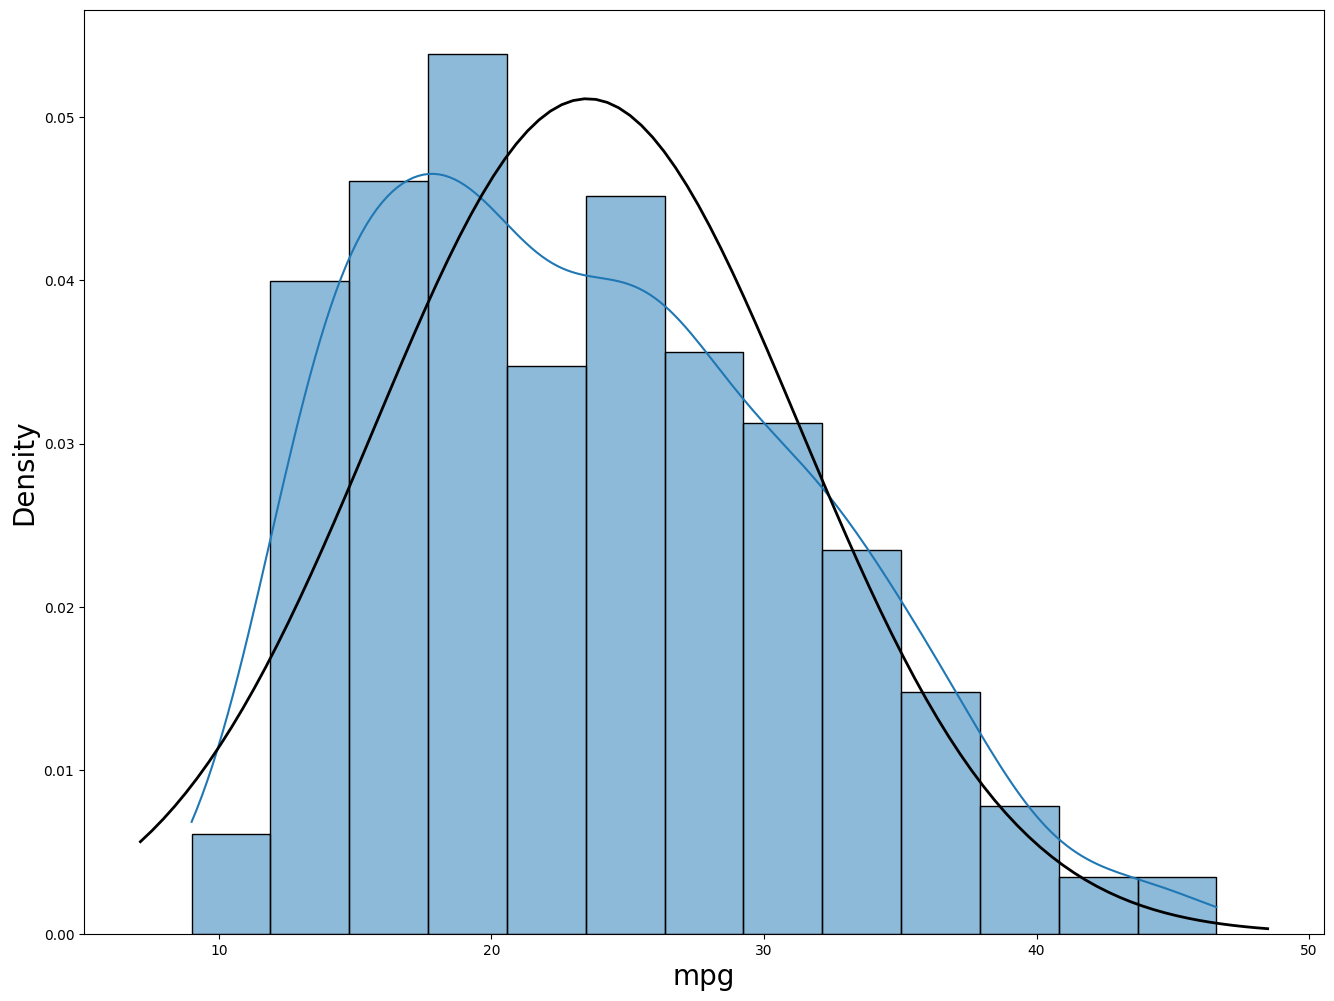

In [ ]:
mu, std = plot_distplot(df, 'mpg')

## Preprocessing

In [ ]:
df = df.drop(['name'], axis=1)
df

,mpg,displacement,horsepower,weight,acceleration,model year,cylinders_4,cylinders_6,cylinders_8,origin_1,...,brand_chevrolet,brand_datsun,brand_dodge,brand_ford,brand_honda,brand_mazda,brand_plymouth,brand_pontiac,brand_toyota,brand_volkswagen
0,2.944439,307.0,130.0,3504,12.0,70,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
1,2.772589,350.0,165.0,3693,11.5,70,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2.944439,318.0,150.0,3436,11.0,70,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
3,2.833213,304.0,150.0,3433,12.0,70,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,2.890372,302.0,140.0,3449,10.5,70,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,3.332205,140.0,86.0,2790,15.6,82,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
394,3.806662,97.0,52.0,2130,24.6,82,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
395,3.496508,135.0,84.0,2295,11.6,82,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
396,3.367296,120.0,79.0,2625,18.6,82,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X = df.drop(['mpg'], axis=1)
y = df['mpg']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

In [ ]:
models = []

## Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.coef_

array([ 0.06838889, -0.09589237, -0.1880509 , -0.0091127 ,  0.10537542,
        0.05654596,  0.00293524,  0.02338428, -0.01884014,  0.02204489,
        0.00188494, -0.00678303,  0.00905602,  0.00086462,  0.02497767,
        0.00449372, -0.01069588,  0.00311836,  0.00356867,  0.01490651,
        0.01788229,  0.00348356, -0.00645842])

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.09971993173050593

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.8989741507387512

In [ ]:
models.append({
    'name': 'Linear Regression',
    'model': lr,
    'rmse': rmse,
    'r^2': r2
})

In [ ]:
alphas = np.logspace(-4, 1, 30)
param_grid = {'alpha': alphas}

ridge = Ridge(max_iter=10000, random_state=42)

grid_search = GridSearchCV(ridge,
                   param_grid,
                   cv=5,
                   scoring='neg_mean_squared_error',
                   refit=True)

grid_search.fit(X_train, y_train)
scores = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

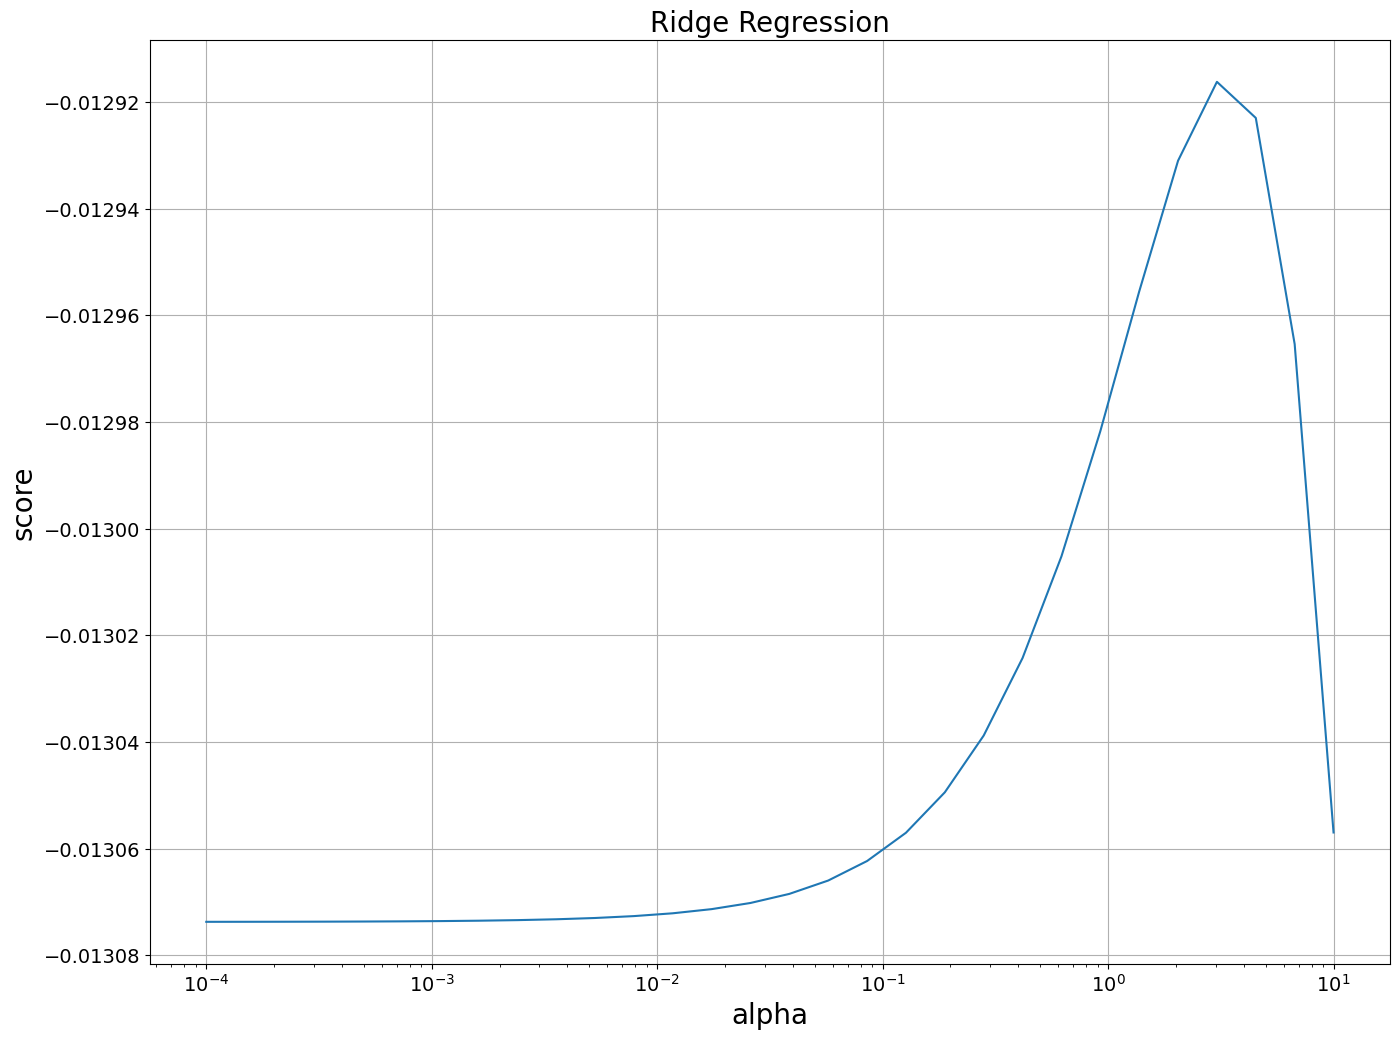

In [ ]:
plt.figure(figsize=(16, 12))
plt.semilogx(alphas, scores)
plt.xlabel('alpha', fontsize=20)
plt.ylabel('score', fontsize=20)
plt.title('Ridge Regression', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

In [ ]:
grid_search.best_estimator_.coef_


array([ 0.04446765, -0.09307988, -0.16959373, -0.01089901,  0.10288934,
        0.05112304, -0.00161113,  0.01898776, -0.01690045,  0.01795895,
        0.00339681, -0.00703015,  0.00837238, -0.00037368,  0.02286041,
        0.00316499, -0.01209231,  0.00273007,  0.00090301,  0.0133288 ,
        0.01699679,  0.00182673, -0.00386757])

In [ ]:
grid_search.best_estimator_


Ridge(alpha=3.039195382313201, max_iter=10000, random_state=42)

In [ ]:
y_pred = grid_search.predict(X_test)


In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.09991805012250926

In [ ]:
r2 = r2_score(y_test, y_pred)
r2


0.8985723261301832

In [ ]:
models.append({
    'name': 'Ridge Regression',
    'model': grid_search.best_estimator_,
    'rmse': rmse,
    'r^2': r2
})

## Lasso Regression

In [ ]:
alphas = np.logspace(-4, -0.5, 30)
param_grid = {'alpha': alphas}

lasso = Lasso(max_iter=10000, random_state=42)

grid_search = GridSearchCV(lasso,
                   param_grid,
                   cv=5,
                   scoring='neg_mean_squared_error',
                   refit=True)

grid_search.fit(X_train, y_train)
scores = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

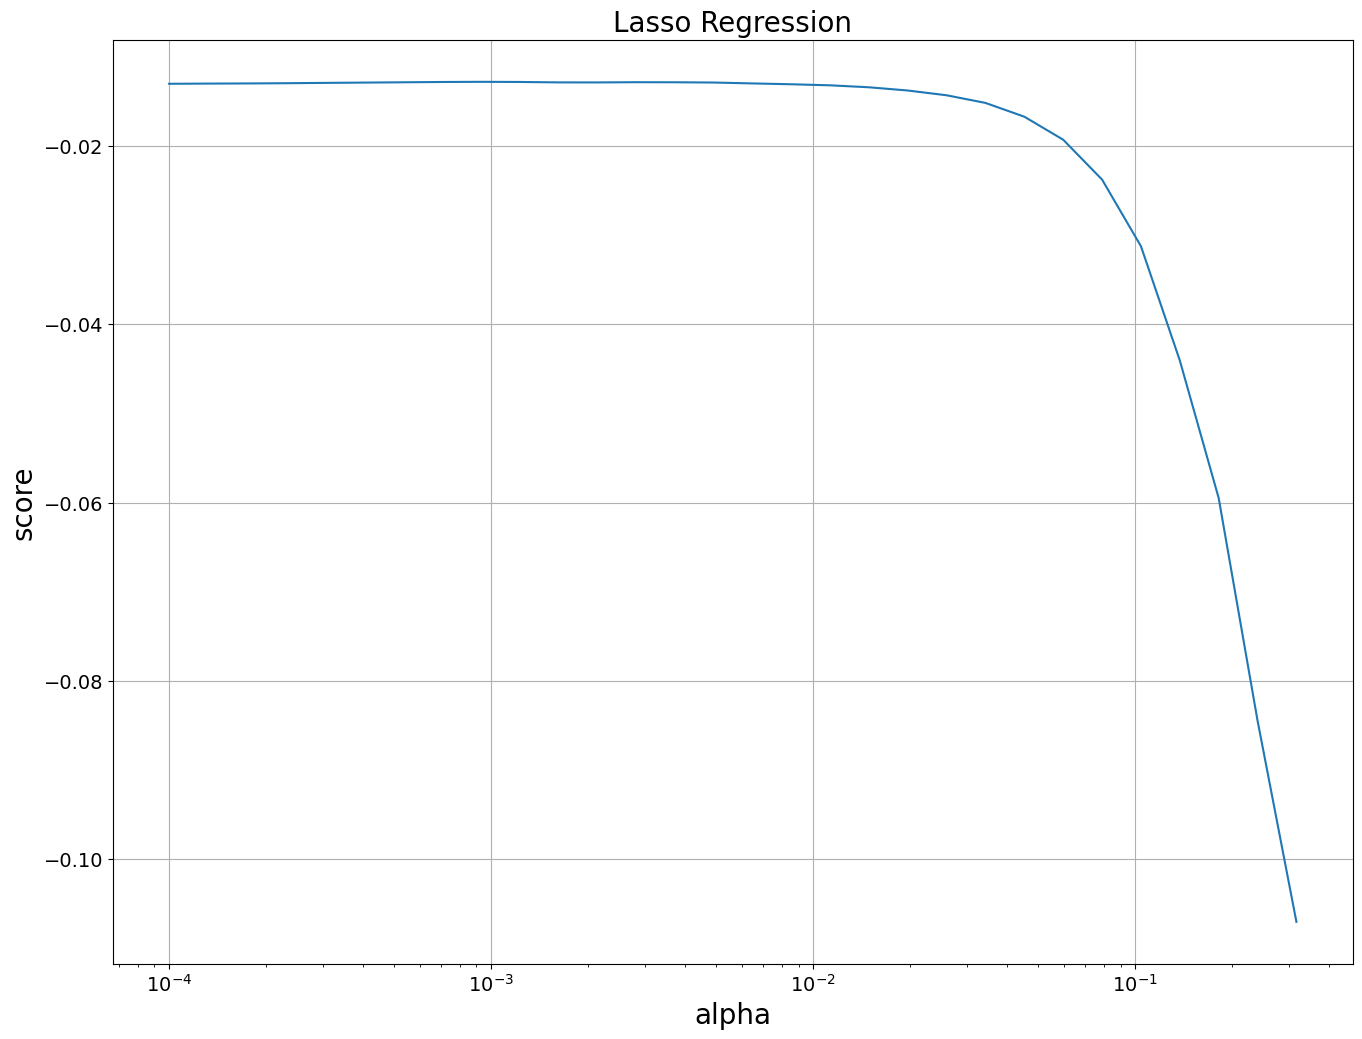

In [ ]:
plt.figure(figsize=(16, 12))
plt.semilogx(alphas, scores)
plt.xlabel('alpha', fontsize=20)
plt.ylabel('score', fontsize=20)
plt.title('Lasso Regression', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

In [ ]:
grid_search.best_estimator_.coef_


array([ 3.89801637e-02, -8.11032847e-02, -1.76816380e-01, -7.31265445e-03,
        1.03601507e-01,  4.61744721e-02, -3.09562468e-03,  1.59400289e-02,
       -1.93462644e-02,  1.08436523e-02,  0.00000000e+00, -7.99023061e-03,
        5.59935677e-03, -1.33886137e-03,  1.98962725e-02,  3.87964555e-04,
       -1.29196224e-02,  9.75834812e-04, -1.24597240e-04,  1.09556583e-02,
        1.52261271e-02,  0.00000000e+00, -1.83776254e-03])

In [ ]:
grid_search.best_estimator_


Lasso(alpha=0.0009236708571873865, max_iter=10000, random_state=42)

In [ ]:
y_pred = grid_search.predict(X_test)


In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.09927672257536654

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.8998701817950855

In [ ]:
models.append({
    'name': 'Lasso Regression',
    'model': grid_search.best_estimator_,
    'rmse': rmse,
    'r^2': r2
})

## ElasticNet

In [ ]:
param_grid = {
    'alpha': np.logspace(-4, -0.5, 30),
    'l1_ratio': np.arange(0.0, 1.0, 0.05)
}

enet = ElasticNet(max_iter=10000, random_state=42)

grid_search = GridSearchCV(enet,
                   param_grid,
                   cv=5,
                   scoring='neg_mean_squared_error',
                   refit=True)

grid_search.fit(X_train, y_train)
scores = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

In [ ]:
plt.figure(figsize=(16, 12))
plt.semilogx(alphas, scores)
plt.xlabel('alpha', fontsize=20)
plt.ylabel('score', fontsize=20)
plt.title('ElastiNet', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

NameError: ignored

In [ ]:
grid_search.best_estimator_.coef_


array([ 0.03822439, -0.08214813, -0.17510913, -0.00777229,  0.10338922,
        0.04643755, -0.00312702,  0.01604942, -0.01956007,  0.01082942,
        0.        , -0.00792144,  0.00580435, -0.00132306,  0.02000323,
        0.00055178, -0.01293257,  0.00107275, -0.00018076,  0.01106545,
        0.01532367,  0.        , -0.00187829])

In [ ]:
grid_search.best_estimator_


ElasticNet(alpha=0.0021261123338996556, l1_ratio=0.4, max_iter=10000,
           random_state=42)

In [ ]:
y_pred = grid_search.predict(X_test)


In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.09934841510445754

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.8997255123960337

In [ ]:
models.append({
    'name': 'ElasticNet',
    'model': grid_search.best_estimator_,
    'rmse': rmse,
    'r^2': r2
})

## KNN Regression

In [ ]:
n_neighbors = list(range(1, 11))
param_grid = {'n_neighbors': n_neighbors}

knn = KNeighborsRegressor()

grid_search = GridSearchCV(knn,
                   param_grid,
                   cv=5,
                   scoring='neg_mean_squared_error',
                   return_train_score=False
                   )

grid_search.fit(X_train, y_train)
scores = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

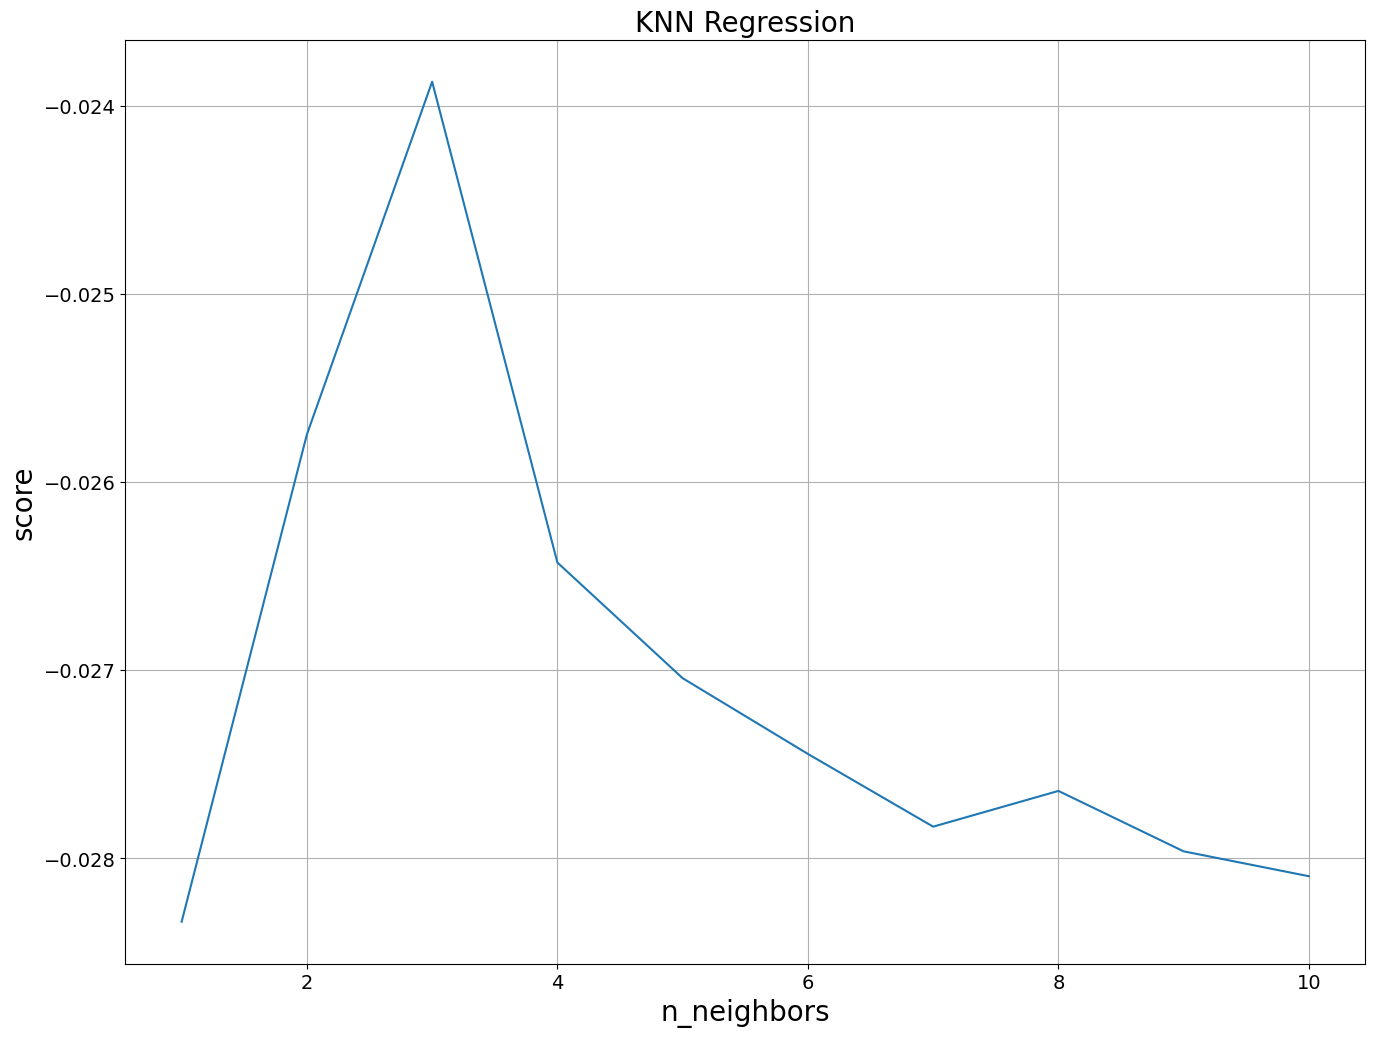

In [ ]:
plt.figure(figsize=(16, 12))
plt.plot(n_neighbors, scores)
plt.xlabel('n_neighbors', fontsize=20)
plt.ylabel('score', fontsize=20)
plt.title('KNN Regression', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()


In [ ]:
grid_search.best_estimator_


KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_pred = grid_search.predict(X_test)


In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse


0.10912761897911849

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.8790132184005041

In [ ]:
models.append({
    'name': 'KNN Regression',
    'model': grid_search.best_estimator_,
    'rmse': rmse,
    'r^2': r2
})

## Decision Tree Regression

In [ ]:
param_grid = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, None],
    'max_features': [2, 4, 8, 16, 32, None],
    'splitter': ['best', 'random'],
}

tree_reg = DecisionTreeRegressor()

grid_search = GridSearchCV(tree_reg,
                   param_grid,
                   cv=5,
                   scoring='neg_mean_squared_error',
                   return_train_score=False
                   )

grid_search.fit(X_train, y_train)
scores = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

In [ ]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=6, max_features=32, splitter='random')

In [ ]:
y_pred = grid_search.predict(X_test)


In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.14323751733007428

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.7915594862510542

In [ ]:
models.append({
    'name': 'Decision Tree Regression',
    'model': grid_search.best_estimator_,
    'rmse': rmse,
    'r^2': r2
})

## Random Forest Regression

In [ ]:
n_estimators = [100, 200, 300, 500, 1000, 5000, 10000]
param_grid = {'n_estimators': n_estimators}


forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg,
                   param_grid,
                   cv=5,
                   scoring='neg_mean_squared_error',
                   return_train_score=False,
                   )

grid_search.fit(X_train, y_train)
scores = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

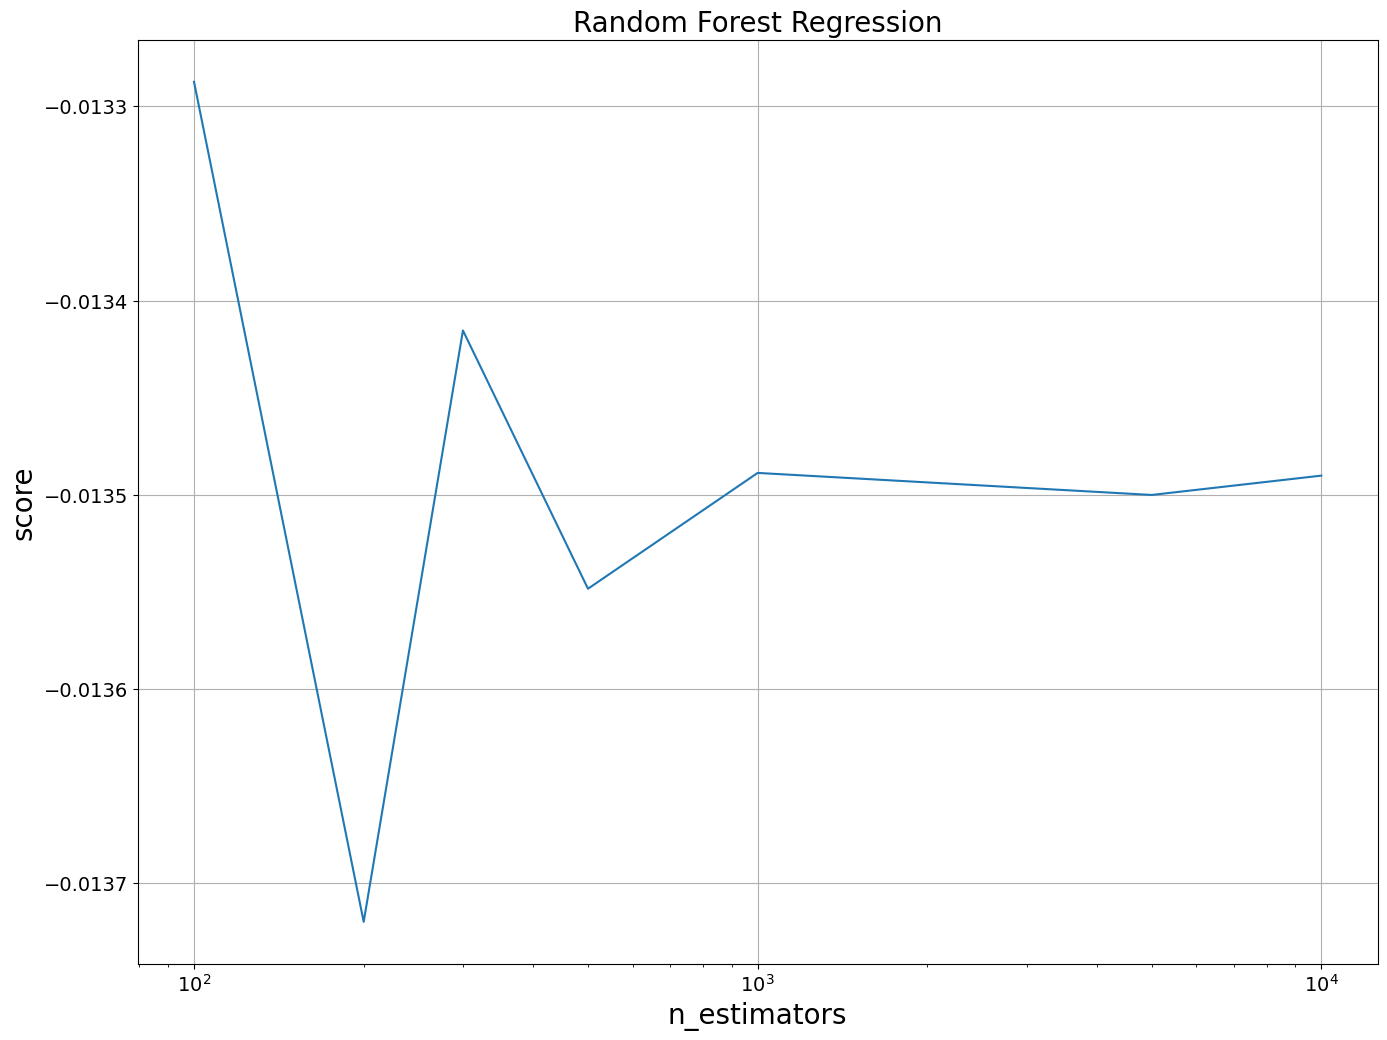

In [ ]:
plt.figure(figsize=(16, 12))
plt.semilogx(n_estimators, scores)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('score', fontsize=20)
plt.title('Random Forest Regression', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

In [ ]:
grid_search.best_estimator_

RandomForestRegressor()

In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.09204152214761357

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.9139331022104387

In [ ]:
models.append({
    'name': 'Random Forest Regression',
    'model': grid_search.best_estimator_,
    'rmse': rmse,
    'r^2': r2
})

## Support Vector Regression

In [ ]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [1, 2, 4, 8, 16],
    'gamma': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3],
    'epsilon': [0.1, 0.2, 0.3, 0.5]
}

svm_reg = SVR()

grid_search = GridSearchCV(svm_reg,
                   param_grid,
                   cv=5,
                   scoring='neg_mean_squared_error',
                   return_train_score=False,
                   )

grid_search.fit(X_train, y_train)
scores = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

In [ ]:
grid_search.best_estimator_

SVR(C=16, gamma=0.001)

In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.0949920689762782

In [ ]:
r2 = r2_score(y_test, y_pred)

In [ ]:
models.append({
    'name': 'Support Vector Regression',
    'model': grid_search.best_estimator_,
    'rmse': rmse,
    'r^2': r2
})

# **Results**

In [ ]:
pd.DataFrame(models).set_index('name').sort_values(['rmse', 'r^2'], ascending=[True, False])


,model,rmse,r^2
name,,,
Random Forest Regression,"(DecisionTreeRegressor(max_features=1.0, rando...",0.092042,0.913933
Support Vector Regression,"SVR(C=16, gamma=0.001)",0.094992,0.908327
Lasso Regression,"Lasso(alpha=0.0009236708571873865, max_iter=10...",0.099277,0.899870
ElasticNet,"ElasticNet(alpha=0.0021261123338996556, l1_rat...",0.099348,0.899726
Linear Regression,LinearRegression(),0.099720,0.898974
Ridge Regression,"Ridge(alpha=3.039195382313201, max_iter=10000,...",0.099918,0.898572
KNN Regression,KNeighborsRegressor(n_neighbors=3),0.109128,0.879013
Decision Tree Regression,"DecisionTreeRegressor(max_depth=6, max_feature...",0.143238,0.791559
